In [11]:
import pandas as pd
import seaborn as sb

dataset = pd.read_csv("mai-ml-lab-1-fiit-2025/train.csv")
dataset.head().info()
dataset.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             5 non-null      object 
 1   Age                         5 non-null      float64
 2   AnnualIncome                5 non-null      float64
 3   CreditScore                 5 non-null      float64
 4   LoanAmount                  5 non-null      float64
 5   LoanDuration                5 non-null      float64
 6   MaritalStatus               5 non-null      object 
 7   NumberOfDependents          5 non-null      float64
 8   HomeOwnershipStatus         5 non-null      object 
 9   MonthlyDebtPayments         5 non-null      float64
 10  CreditCardUtilizationRate   5 non-null      float64
 11  NumberOfOpenCreditLines     5 non-null      float64
 12  NumberOfCreditInquiries     5 non-null      float64
 13  DebtToIncomeRatio           5 non-null 

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
count,10487.000000,10487.000000,9986.000000,9986.000000,10487.000000,10487.000000,9986.000000,10487.000000,10487.000000,10487.000000,...,10487.000000,10487.000000,10487.000000,10487.000000,9.986000e+03,9986.000000,10487.000000,10487.000000,10487.000000,1.048700e+04
mean,39.850386,131587.872127,678.082716,29874.218306,53.439878,1.568323,546.458642,0.284397,3.033565,0.979498,...,10838.934141,0.784428,4.949271,17.628302,1.542381e+05,0.200392,0.200112,1075.622426,0.517577,-2.569878e+04
std,11.614132,115791.941909,175.192486,27705.509722,24.493562,1.418684,501.981888,0.159240,1.740186,0.990927,...,9385.924858,0.123039,2.201100,11.337248,4.622229e+05,0.094388,0.096458,1344.053181,0.894637,1.431675e+06
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,1250.000000,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,-9.999999e+06
25%,32.000000,20959.500000,550.000000,12658.000000,36.000000,0.000000,233.250000,0.158929,2.000000,0.000000,...,1683.541667,0.708475,3.000000,9.000000,7.252500e+03,0.119908,0.119548,375.872620,0.066734,3.256475e+01
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,398.000000,0.262229,3.000000,1.000000,...,7371.250000,0.803692,5.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,4.411876e+01
75%,48.000000,257025.000000,850.000000,37158.000000,60.000000,3.000000,685.000000,0.391683,4.000000,2.000000,...,21232.583333,0.879312,6.000000,26.000000,1.241758e+05,0.264709,0.264880,1279.930203,0.637457,6.535690e+01
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,25000.000000,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000e+07


<Axes: xlabel='RiskScore', ylabel='Count'>

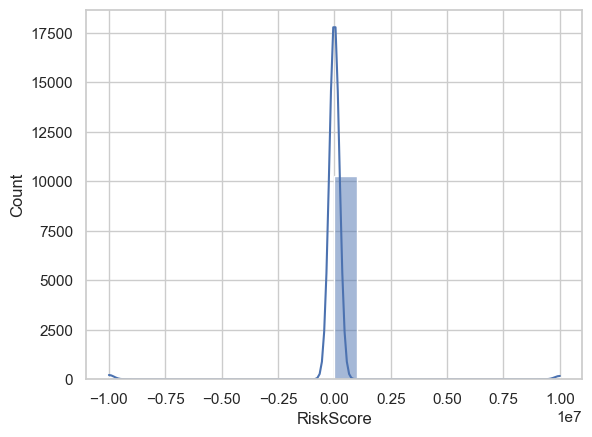

In [12]:
sb.histplot(dataset['RiskScore'], bins=20, kde=True)

Датасет говна получается, надо отфильтровать 

In [13]:
sorted_values = sorted(dataset['RiskScore'].unique(), reverse=False)
print(sorted_values[:5])
sorted_values = sorted(dataset['RiskScore'].unique(), reverse=True)
print(sorted_values[:5])

[np.float64(-9999999.0), np.float64(14.841417296887238), np.float64(17.83559140502518), np.float64(18.71538017830329), np.float64(18.85475836007989)]
[np.float64(10000000.0), np.float64(97.59724939432462), np.float64(96.17254047087664), np.float64(96.08284990996556), np.float64(94.09863394864976)]


аГА, Выяснили минимальное и максимальное значение, теперь можем выбрать только нужные нам строки

<Axes: xlabel='RiskScore', ylabel='Count'>

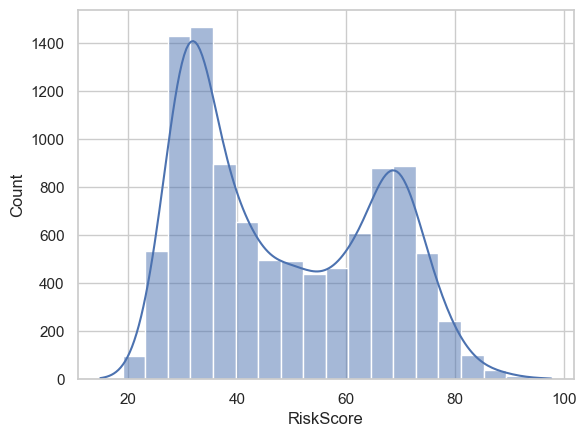

In [14]:
cleaned_dataset = dataset[(dataset['RiskScore'] >= 0) & (dataset['RiskScore'] <= 100)].copy()
sb.histplot(cleaned_dataset['RiskScore'], bins=20, kde=True)

У нас биомдальное распределение что значит есть некоторые параметры которые оч хорошо разделяют группы, скорее всего это кредитный рейтинг и наличие дефолтов

Заметил что у нас есть люди без credit score. Удалять эти данные я не буду, лучше заполню значения медианой

In [15]:
median_credit_score = cleaned_dataset['CreditScore'].median()
cleaned_dataset['CreditScore'].fillna(median_credit_score, inplace=True)

Отлично, почистили, теперь составим новые гистограммы по моим гипотезам


Строим график 1: RiskScore vs AnnualIncome...


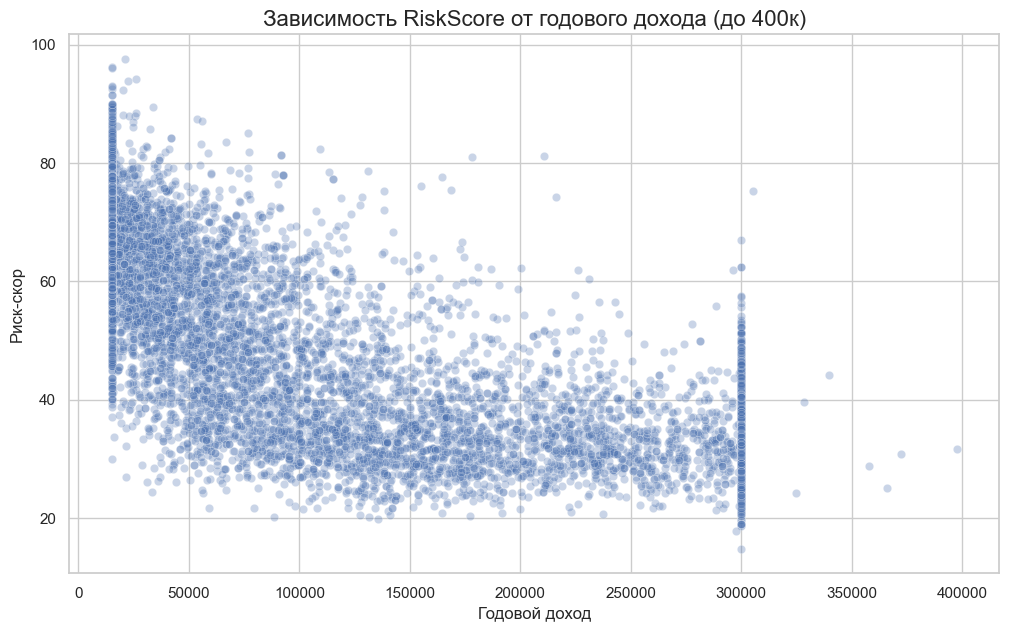

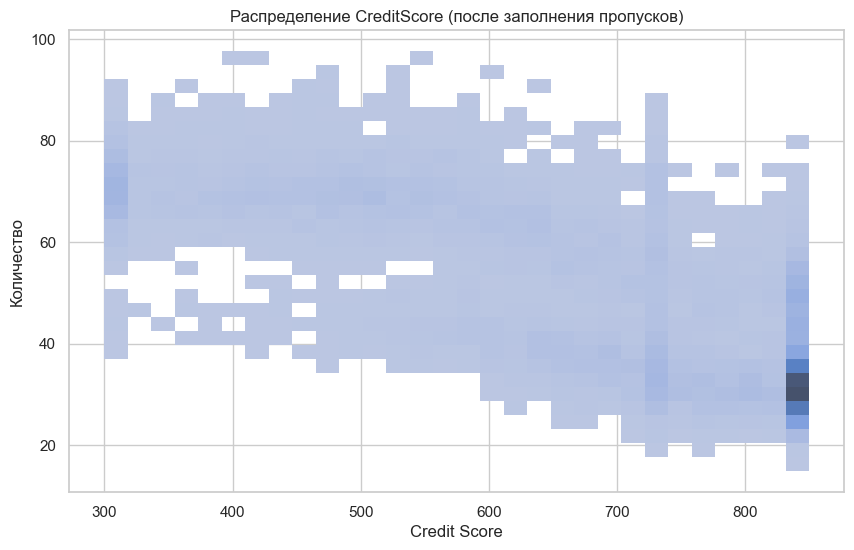

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# --- График 1: RiskScore vs AnnualIncome (Годовой доход) ---
# Так как доход может иметь очень большой разброс, ограничим его для наглядности
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=cleaned_dataset[cleaned_dataset['AnnualIncome'] < 400000], # Убираем выбросы для лучшей визуализации
    x='AnnualIncome',
    y='RiskScore',
    alpha=0.3
)
plt.title('Зависимость RiskScore от годового дохода (до 400к)', fontsize=16)
plt.xlabel('Годовой доход')
plt.ylabel('Риск-скор')
print("\nСтроим график 1: RiskScore vs AnnualIncome...")
plt.show()

# 2.2. Гистограмма для CreditScore
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_dataset, x='CreditScore', y='RiskScore', kde=True, bins=30)
plt.title('Распределение CreditScore (после заполнения пропусков)')
plt.xlabel('Credit Score')
plt.ylabel('Количество')
plt.show()




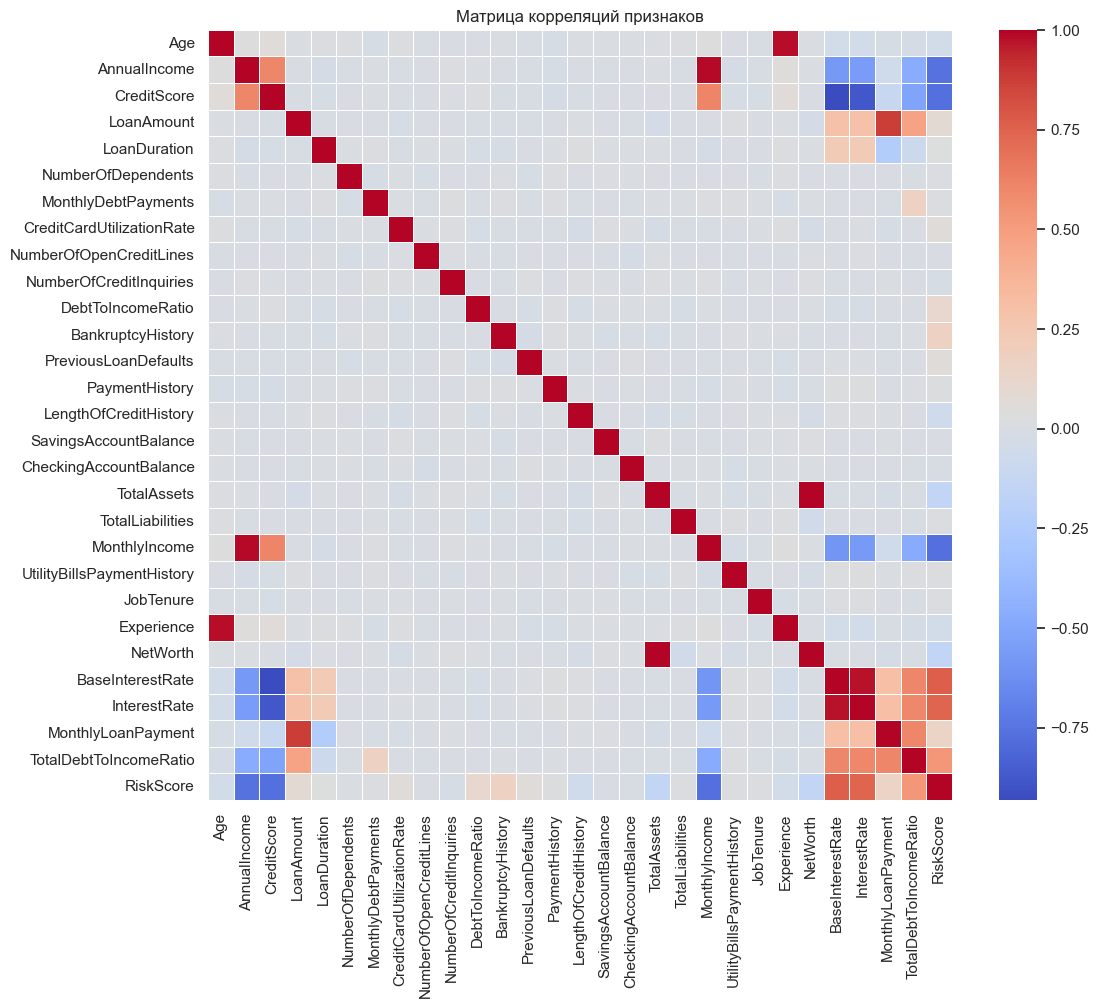

Топ корреляций с RiskScore:
RiskScore                 1.000000
MonthlyIncome             0.770267
CreditScore               0.766043
BaseInterestRate          0.758712
AnnualIncome              0.758514
InterestRate              0.742634
TotalDebtToIncomeRatio    0.530729
BankruptcyHistory         0.177559
MonthlyLoanPayment        0.150830
TotalAssets               0.145735
Name: RiskScore, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Строим матрицу корреляций только для числовых колонок
plt.figure(figsize=(12, 10))
# Выбираем числовые признаки
numeric_data = cleaned_dataset.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Рисуем тепловую карту
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Матрица корреляций признаков")
plt.show()

# Выводим топ-10 признаков, коррелирующих с RiskScore
print("Топ корреляций с RiskScore:")
print(correlation_matrix['RiskScore'].abs().sort_values(ascending=False).head(10))

In [18]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, PowerTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression, VarianceThreshold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import NotFittedError

RANDOM_STATE = 42

train_path = '/Users/kirill/ML/Lab_1/mai-ml-lab-1-fiit-2025/train.csv'
test_path  = '/Users/kirill/ML/Lab_1/mai-ml-lab-1-fiit-2025/test.csv'
submission_path = '/Users/kirill/ML/Lab_1/mai-ml-lab-1-fiit-2025/submission_final.csv'

if not os.path.exists(train_path):
    raise FileNotFoundError(train_path)

def safe_log1p_ser(s):
    s = pd.to_numeric(s, errors='coerce').copy()
    if s.isnull().all():
        return s
    mn = s.min(skipna=True)
    if pd.notna(mn) and mn < 0:
        shift = abs(mn) + 1.0
        return np.log1p(s + shift)
    else:
        return np.log1p(s.fillna(0))

def analytic_optimal_weight(y, pred_a, pred_b):
    d = pred_a - pred_b
    denom = np.dot(d, d)
    if denom == 0:
        return 0.5
    w = float(np.dot(d, (y - pred_b)) / denom)
    return float(np.clip(w, 0.0, 1.0))

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path) if os.path.exists(test_path) else None

def preprocess_base(df, is_train=True):
    df = df.copy()
    if is_train and 'RiskScore' in df.columns:
        df = df[df['RiskScore'].between(0,100)].copy()
    df.replace(-9999999.0, np.nan, inplace=True)
    if 'ApplicationDate' in df.columns:
        df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')
        df['App_Year'] = df['ApplicationDate'].dt.year.fillna(0).astype(int)
        df['App_Month'] = df['ApplicationDate'].dt.month.fillna(0).astype(int)
        df['App_DayOfWeek'] = df['ApplicationDate'].dt.dayofweek.fillna(0).astype(int)
    eps = 1e-6
    if 'MonthlyLoanPayment' in df.columns and 'MonthlyIncome' in df.columns:
        df['PaymentToIncomeRatio'] = df['MonthlyLoanPayment'] / (df['MonthlyIncome'] + eps)
    if 'LoanAmount' in df.columns and 'AnnualIncome' in df.columns:
        df['LoanToIncomeRatio'] = df['LoanAmount'] / (df['AnnualIncome'] + eps)
    if 'TotalLiabilities' in df.columns and 'TotalAssets' in df.columns:
        df['DebtToAssetsRatio'] = df['TotalLiabilities'] / (df['TotalAssets'] + eps)
    if 'SavingsAccountBalance' in df.columns and 'LoanAmount' in df.columns:
        df['SavingsToLoanRatio'] = df['SavingsAccountBalance'] / (df['LoanAmount'] + eps)
    if 'LengthOfCreditHistory' in df.columns and 'PaymentHistory' in df.columns:
        df['CreditHistoryInteraction'] = df['LengthOfCreditHistory'] * df['PaymentHistory']
    if 'MonthlyIncome' in df.columns and 'CreditScore' in df.columns:
        df['Income_x_CreditScore'] = df['MonthlyIncome'].fillna(0) * df['CreditScore'].fillna(0)
    clip_cols = ['MonthlyIncome','LoanAmount','AnnualIncome','SavingsAccountBalance','TotalAssets','TotalLiabilities','MonthlyDebtPayments']
    for c in clip_cols:
        if c in df.columns:
            lo = df[c].quantile(0.01)
            hi = df[c].quantile(0.99)
            df[c] = df[c].clip(lo, hi)
    log_candidates = ['MonthlyIncome','LoanAmount','SavingsAccountBalance','CheckingAccountBalance','TotalAssets','TotalLiabilities','NetWorth','MonthlyDebtPayments']
    for c in log_candidates:
        if c in df.columns:
            df[c] = safe_log1p_ser(df[c])
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    return df

train_proc = preprocess_base(train_df, is_train=True)
test_proc = preprocess_base(test_df, is_train=False) if test_df is not None else None

target = 'RiskScore'
numerical_candidates = [
    'CreditScore','MonthlyIncome','BaseInterestRate','LoanAmount','LoanDuration',
    'DebtToIncomeRatio','NumberOfDependents','NumberOfOpenCreditLines','NumberOfCreditInquiries',
    'PaymentHistory','LengthOfCreditHistory','UtilityBillsPaymentHistory','MonthlyDebtPayments',
    'CreditCardUtilizationRate','InterestRate','TotalDebtToIncomeRatio','SavingsAccountBalance',
    'CheckingAccountBalance','TotalAssets','TotalLiabilities','NetWorth','JobTenure','Experience','Age',
    'BankruptcyHistory','PreviousLoanDefaults','PaymentToIncomeRatio','LoanToIncomeRatio','DebtToAssetsRatio',
    'SavingsToLoanRatio','CreditHistoryInteraction','Income_x_CreditScore','App_Year','App_Month','App_DayOfWeek'
]
numerical = [c for c in numerical_candidates if c in train_proc.columns]
categorical_candidates = ['MaritalStatus','HomeOwnershipStatus','EmploymentStatus','EducationLevel','LoanPurpose']
categorical = [c for c in categorical_candidates if c in train_proc.columns]
binned = [c for c in ['Age','CreditScore'] if c in train_proc.columns]
final_numerical = [c for c in numerical if c not in binned]
all_features = final_numerical + categorical + binned

def drop_high_corr(df, features, thresh=0.95):
    num_df = df[features].select_dtypes(include=[np.number]).copy()
    corr = num_df.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > thresh)]
    return to_drop

to_drop = drop_high_corr(train_proc, final_numerical, thresh=0.95)
if to_drop:
    final_numerical = [f for f in final_numerical if f not in to_drop]
    all_features = final_numerical + categorical + binned

train_proc = train_proc.dropna(subset=[target], how='any')
X = train_proc[all_features].copy()
y = train_proc[target].copy()
try:
    y_bins = pd.cut(y, bins=6, labels=False)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y_bins)
except Exception:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

pre_k = 400
final_k = 800
interaction_only = False
n_bins = 20
poly_degree = 2

numeric_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('power', PowerTransformer(method='yeo-johnson', standardize=True))])
categorical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='Missing')), ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
binned_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('bin', KBinsDiscretizer(n_bins=n_bins, encode='onehot-dense', strategy='quantile'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, final_numerical),
    ('cat', categorical_pipeline, categorical),
    ('bin', binned_pipeline, binned)
], remainder='drop')

pipe = Pipeline([
    ('preproc', preprocessor),
    ('var', VarianceThreshold(threshold=1e-5)),
    ('pre_select', SelectKBest(score_func=f_regression, k=min(pre_k, X_train.shape[1]))),
    ('poly', PolynomialFeatures(degree=poly_degree, interaction_only=interaction_only, include_bias=False)),
    ('select', SelectKBest(score_func=f_regression, k=min(final_k, 5000)))
])

Xt_train = pipe.fit_transform(X_train, y_train)
Xt_val   = pipe.transform(X_val)
print("Transformed shapes:", Xt_train.shape, Xt_val.shape)

prev_best_alpha = 43.28761281083057

alpha_grid = np.logspace(np.log10(prev_best_alpha/10), np.log10(prev_best_alpha*10), 21)

best_overall = {'mse': 1e9}
for alpha in alpha_grid:
    try:
        ridge = Ridge(alpha=float(alpha)).fit(Xt_train, y_train)
        lr = LinearRegression().fit(Xt_train, y_train)
        pred_lr = np.clip(lr.predict(Xt_val), 0, 100)
        pred_rg = np.clip(ridge.predict(Xt_val), 0, 100)

        w_analytic = analytic_optimal_weight(y_val.values, pred_lr, pred_rg)

        low = max(0.0, w_analytic - 0.05)
        high = min(1.0, w_analytic + 0.05)
        if high - low < 1e-6:
            weight_candidates = np.array([w_analytic])
        else:
            step = 0.001
            weight_candidates = np.clip(np.arange(low, high+1e-12, step), 0.0, 1.0)

        best_local = (None, 1e9)
        for w in weight_candidates:
            pred_mix = np.clip(w * pred_lr + (1.0 - w) * pred_rg, 0, 100)
            mse_mix = mean_squared_error(y_val, pred_mix)
            if mse_mix < best_local[1]:
                best_local = (w, mse_mix)

        w_best, mse_best = best_local
        if mse_best < best_overall['mse']:
            best_overall = {
                'alpha': float(alpha),
                'w': float(w_best),
                'mse': float(mse_best),
                'mse_lr': float(mean_squared_error(y_val, pred_lr)),
                'mse_ridge': float(mean_squared_error(y_val, pred_rg))
            }
        print(f"alpha={alpha:.5g} | analytic_w={w_analytic:.4f} | local_w={w_best:.4f} | mse={mse_best:.6f}")
    except Exception as e:
        print("alpha", alpha, "failed:", e)
        continue

print("\nBEST FOUND:")
print(best_overall)

if best_overall['mse'] < 1e8:
    chosen_alpha = best_overall['alpha']
    chosen_w = best_overall['w']
    X_full = pd.concat([X_train, X_val])
    y_full = pd.concat([y_train, y_val])
    pipe_final = pipe
    Xt_full = pipe_final.fit_transform(X_full, y_full)
    Xt_test = pipe_final.transform(test_proc[all_features]) if test_proc is not None else None

    lr_full = LinearRegression().fit(Xt_full, y_full)
    ridge_full = Ridge(alpha=chosen_alpha).fit(Xt_full, y_full)

    pred_lr_full = np.clip(lr_full.predict(Xt_full), 0, 100)
    pred_rg_full = np.clip(ridge_full.predict(Xt_full), 0, 100)
    w_full = chosen_w

    print(f"Refit complete. chosen_alpha={chosen_alpha}, chosen_w={w_full:.4f}")

    if Xt_test is not None:
        p_lr = np.clip(lr_full.predict(Xt_test), 0, 100)
        p_rg = np.clip(ridge_full.predict(Xt_test), 0, 100)
        p_ens = np.clip(w_full * p_lr + (1.0 - w_full) * p_rg, 0, 100)
        if 'ID' in test_df.columns:
            sub = pd.DataFrame({'ID': test_df['ID'], 'RiskScore': p_ens})
        else:
            sub = pd.DataFrame({'RiskScore': p_ens})
        sub.to_csv(submission_path, index=False)
        print("Saved submission to:", submission_path)



Transformed shapes: (8217, 779) (2055, 779)
alpha=4.3288 | analytic_w=0.2220 | local_w=0.2220 | mse=28.723055
alpha=5.4496 | analytic_w=0.2360 | local_w=0.2360 | mse=28.703317
alpha=6.8606 | analytic_w=0.2498 | local_w=0.2498 | mse=28.681794
alpha=8.637 | analytic_w=0.2636 | local_w=0.2636 | mse=28.658387
alpha=10.873 | analytic_w=0.2773 | local_w=0.2773 | mse=28.633113
alpha=13.689 | analytic_w=0.2911 | local_w=0.2911 | mse=28.606139
alpha=17.233 | analytic_w=0.3052 | local_w=0.3052 | mse=28.577793
alpha=21.695 | analytic_w=0.3197 | local_w=0.3197 | mse=28.548550
alpha=27.313 | analytic_w=0.3349 | local_w=0.3349 | mse=28.518992
alpha=34.385 | analytic_w=0.3509 | local_w=0.3509 | mse=28.489753
alpha=43.288 | analytic_w=0.3679 | local_w=0.3679 | mse=28.461441
alpha=54.496 | analytic_w=0.3858 | local_w=0.3858 | mse=28.434584
alpha=68.606 | analytic_w=0.4047 | local_w=0.4047 | mse=28.409590
alpha=86.37 | analytic_w=0.4242 | local_w=0.4242 | mse=28.386742
alpha=108.73 | analytic_w=0.4443 |

In [ ]:
X_manual_train = Xt_train.toarray() if hasattr(Xt_train, 'toarray') else Xt_train
X_manual_val = Xt_val.toarray() if hasattr(Xt_val, 'toarray') else Xt_val
y_manual_train = y_train.values if hasattr(y_train, 'values') else y_train
y_manual_val = y_val.values if hasattr(y_val, 'values') else y_val

print("Данные для ручной реализации подготовлены.")

Данные для ручной реализации подготовлены.


In [ ]:
# 1. Реализация нормализации вручную
class CustomMinMaxScaler:
    def fit(self, X):
        self.min_ = X.min(axis=0)
        self.max_ = X.max(axis=0)
        return self
    
    def transform(self, X):
        return (X - self.min_) / (self.max_ - self.min_ + 1e-10)
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

class CustomStandardScaler:
    def fit(self, X):
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        return self
    
    def transform(self, X):
        return (X - self.mean_) / (self.std_ + 1e-10)

print("Пример MinMax (первые 5 строк, 1 признак):")
print(CustomMinMaxScaler().fit_transform(X_manual_train[:5, :1]).flatten())

Пример MinMax (первые 5 строк, 1 признак):
[1.         0.7759082  0.62871915 0.44243463 0.        ]


In [ ]:
# 2. Класс линейной регрессии (Analytical, GD, SGD + Regularization)
class MyLinearRegression:
    def __init__(self, method='analytical', lr=0.01, epochs=500, batch_size=32, reg_type=None, C=1.0):
        self.method = method
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_type = reg_type
        self.C = C
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        if self.method == 'analytical':
            X_b = np.c_[np.ones((n_samples, 1)), X]
            reg_matrix = self.C * np.eye(n_features + 1)
            reg_matrix[0, 0] = 0
            
            try:
                self.weights = np.linalg.inv(X_b.T.dot(X_b) + reg_matrix).dot(X_b.T).dot(y)
            except np.linalg.LinAlgError:
                self.weights = np.linalg.pinv(X_b.T.dot(X_b) + reg_matrix).dot(X_b.T).dot(y)
        
        else:
            self.weights = np.random.randn(n_features) * 0.01
            self.bias = 0
            
            for _ in range(self.epochs):
                if self.method == 'gd':
                    self._update_weights(X, y, n_samples)
                elif self.method == 'sgd':
                    indices = np.random.permutation(n_samples)
                    X_shuffled, y_shuffled = X[indices], y[indices]
                    for i in range(0, n_samples, self.batch_size):
                        self._update_weights(X_shuffled[i:i+self.batch_size], 
                                             y_shuffled[i:i+self.batch_size], 
                                             len(X_shuffled[i:i+self.batch_size]))

    def _update_weights(self, X, y, n):
        y_pred = X.dot(self.weights) + self.bias
        loss = y_pred - y
        
        dw = (2/n) * X.T.dot(loss)
        db = (2/n) * np.sum(loss)
        
        if self.reg_type == 'L2':
            dw += 2 * self.C * self.weights
        elif self.reg_type == 'L1':
            dw += self.C * np.sign(self.weights)

        self.weights -= self.lr * dw
        self.bias -= self.lr * db

    def predict(self, X):
        if self.method == 'analytical':
            X_b = np.c_[np.ones((X.shape[0], 1)), X]
            return X_b.dot(self.weights)
        return X.dot(self.weights) + self.bias

print("Обучение SGD (L2)...")
my_sgd = MyLinearRegression(method='sgd', lr=0.01, epochs=10, reg_type='L2', C=0.1)
my_sgd.fit(X_manual_train, y_manual_train)
print("SGD Predict sample:", my_sgd.predict(X_manual_val[:5]))

Обучение SGD (L2)...
SGD Predict sample: [77.19201993 47.57100229 72.61631795 33.22704772 24.16939596]


In [ ]:
# 3. Реализация метрик вручную
def custom_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def custom_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def custom_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

def custom_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / (ss_tot + 1e-10))

print("\nСравнение метрик (Custom vs Sklearn) на основной модели:")
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

if 'pred_rg' not in locals():
    pred_rg = ridge.predict(Xt_val)

print(f"MSE:  {custom_mse(y_val, pred_rg):.4f} (Custom) vs {mean_squared_error(y_val, pred_rg):.4f} (Sklearn)")
print(f"MAE:  {custom_mae(y_val, pred_rg):.4f} (Custom) vs {mean_absolute_error(y_val, pred_rg):.4f} (Sklearn)")
print(f"R2:   {custom_r2(y_val, pred_rg):.4f} (Custom) vs {r2_score(y_val, pred_rg):.4f} (Sklearn)")


Сравнение метрик (Custom vs Sklearn) на основной модели:
MSE:  29.5842 (Custom) vs 29.5842 (Sklearn)
MAE:  4.0822 (Custom) vs 4.0822 (Sklearn)
R2:   0.9018 (Custom) vs 0.9018 (Sklearn)


In [ ]:
# 4. Реализация кросс-валидации
def custom_k_fold_cv(X, y, k=5, model=None):
    n_samples = len(y)
    fold_size = n_samples // k
    indices = np.arange(n_samples)
    
    scores = []
    
    print(f"Запуск K-Fold (k={k})...")
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i != k - 1 else n_samples
        val_idx = indices[start:end]
        
        train_idx = np.concatenate([indices[:start], indices[end:]])
        
        model.fit(X[train_idx], y[train_idx])
        preds = model.predict(X[val_idx])
        
        score = custom_mse(y[val_idx], preds)
        scores.append(score)
        
    return np.mean(scores)

def custom_leave_one_out(X, y, model=None):
    return custom_k_fold_cv(X, y, k=len(y), model=model)

sub_X = X_manual_train[:100]
sub_y = y_manual_train[:100]

model_for_cv = MyLinearRegression(method='analytical', C=1.0) 

k_fold_score = custom_k_fold_cv(sub_X, sub_y, k=5, model=model_for_cv)
print(f"K-Fold MSE: {k_fold_score:.4f}")

loo_score = custom_leave_one_out(sub_X[:20], sub_y[:20], model=model_for_cv)
print(f"Leave-One-Out MSE (subset): {loo_score:.4f}")

Запуск K-Fold (k=5)...
K-Fold MSE: 69.8667
Запуск K-Fold (k=20)...
Leave-One-Out MSE (subset): 112.5800
